# Hotel Reservation Cancellation Prediction

## Context

A hotel is need in support to increase revenue from their room bookings. They believe that they can use data science to help then reduce the number of cancellations by identify what contributes to whether a booking will be fulfilled or cancelled.

## Questions

- What factor affect whether customers cancel their booking?
- Are cancellations more likely during weekends?
- Which general recommendations for the hotel can we make?
- Can we create a prediction model to know whether the reservation is likely to be cancelled or not?

In [100]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Basic Analysis

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Feature description**

- **Booking_ID**: unique identifier of each booking
- **no_of_adults**: Number of adults
- **no_of_children**: Number of Children
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **type_of_meal_plan**: Type of meal plan booked by the customer:
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
- **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- **lead_time**: Number of days between the date of booking and the arrival date
- **arrival_year**: Year of arrival date
- **arrival_month**: Month of arrival date
- **arrival_date**: Date of the month
- **market_segment_type**: Market segment designation.
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
- **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
- **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status**: Flag indicating if the booking was canceled or not.

In [4]:
df.shape

(36275, 19)

In general, the data contains 36275 records and there exists to be no missing values appear in the dataset.

- 4 categorical features: `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `booking_status`.

- The remaining, except for `Booking_ID` are numerical features.

- `booking_status` will be the target feature, which we will use as labels for creating a model predictor.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Within numerical columns, there is no errornous value found (since minimum of all columns is expected to be zero).

The data is covered from 2017 to 2018. We can inspect the number of cancellations on every month then.

In [6]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Booking_ID---------------------------------------- ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
type_of_meal_plan--------------------------------- ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved-------------------------------- ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type------------------------------- ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status------------------------------------ ['Not_Canceled' 'Canceled']


## 2. What factor affect whether customers cancel there booking?

First, we are inspecting every discrete feature independently, except time indicator one (`arrival_year`, `arrival_month`, `arrival_date`), `Booking_ID` with respect to `booking_status`.

In [7]:
df = df.set_index('Booking_ID')
target_df = df.pop('booking_status')

In [60]:
target_df.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

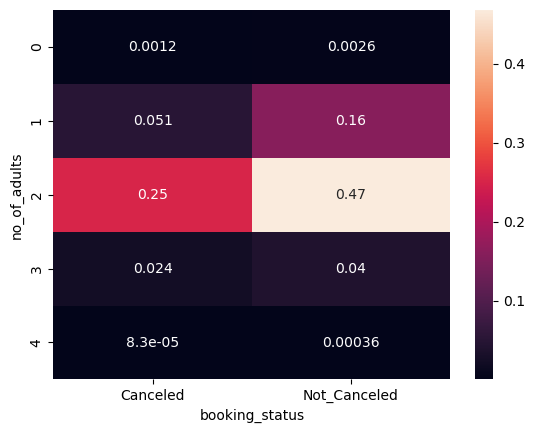

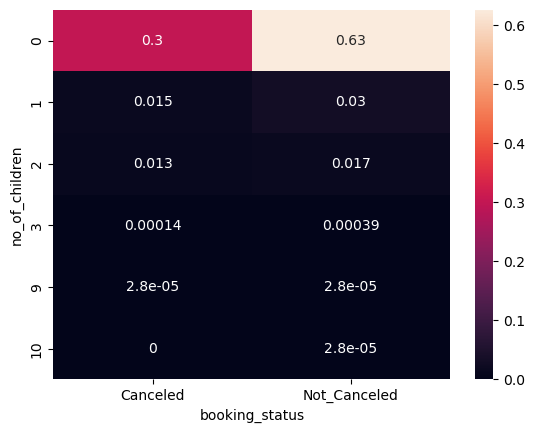

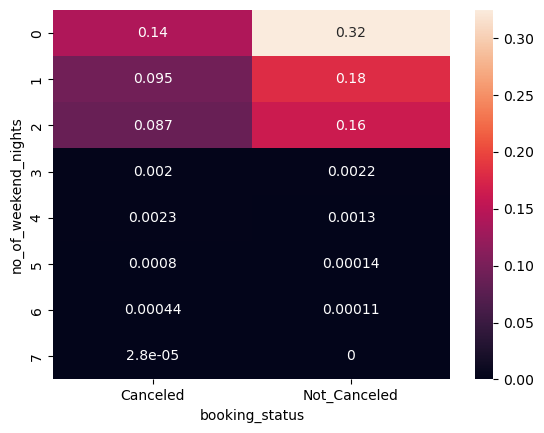

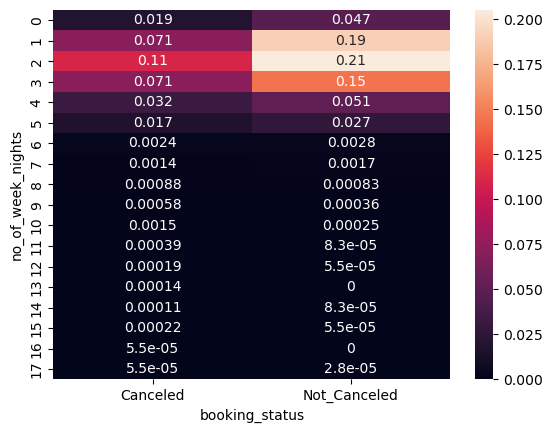

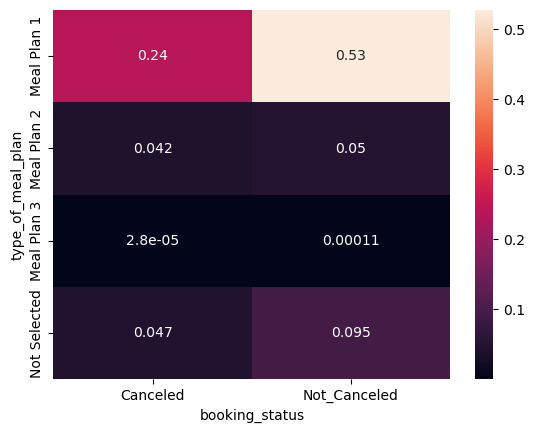

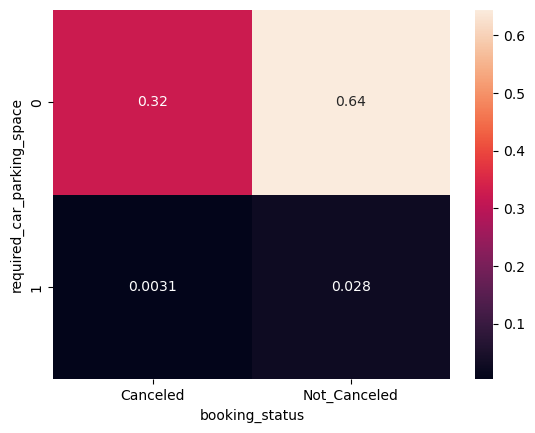

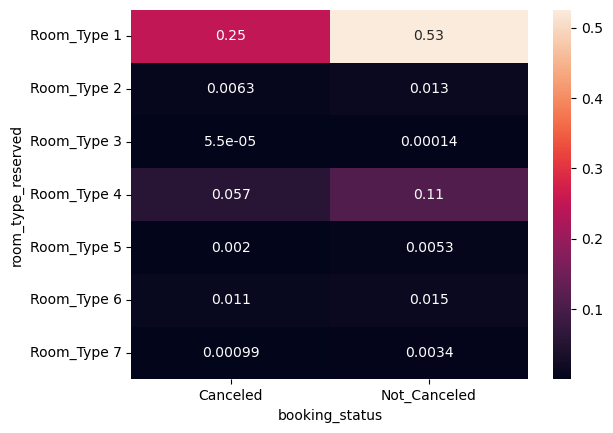

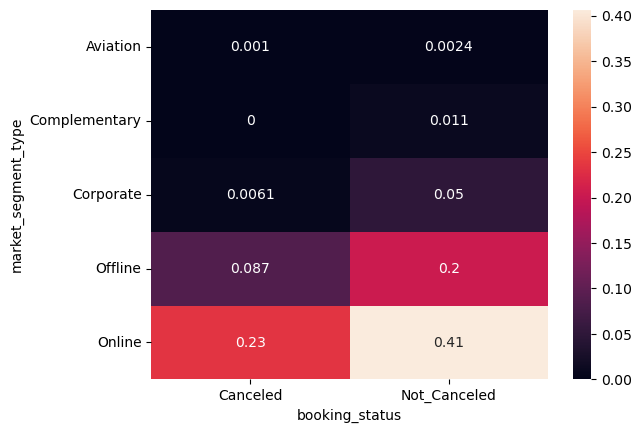

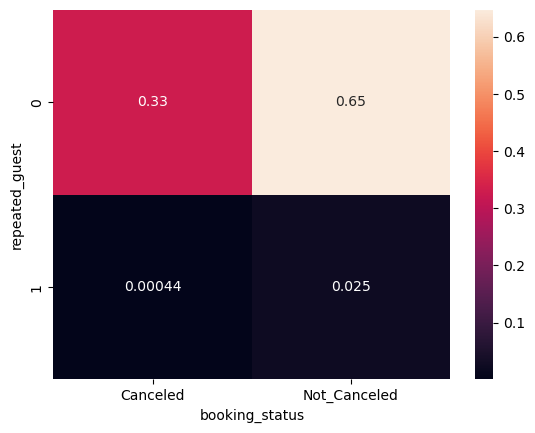

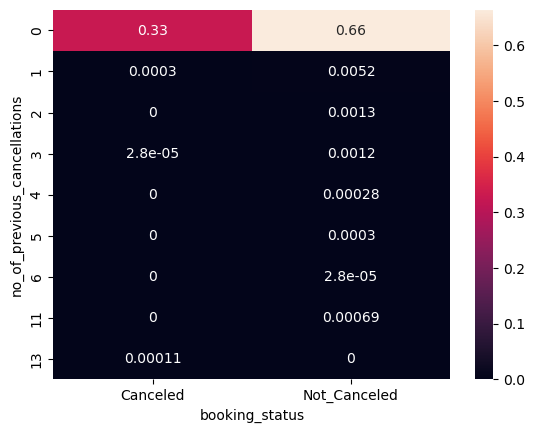

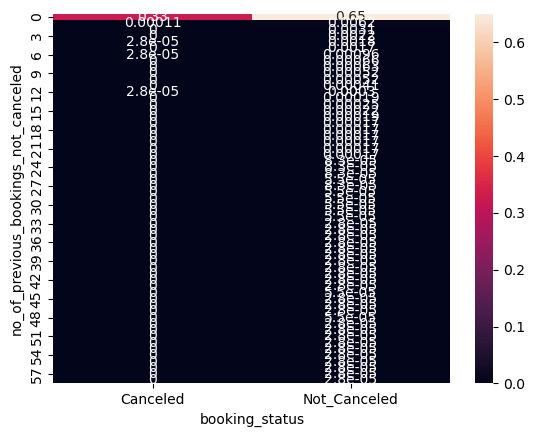

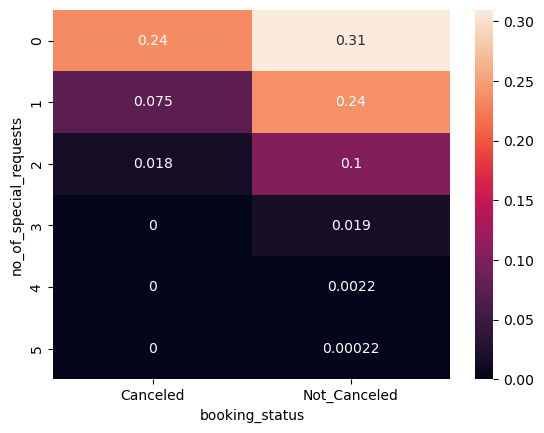

In [8]:
unselected_columns = ['arrival_year', 'arrival_date', 'arrival_month', 'lead_time', 'avg_price_per_room']
for col in df.columns:
    if col not in unselected_columns:
        plt.figure()
        sns.heatmap(pd.crosstab(df[col], target_df) / len(df), annot=True)

There is a common pattern in discrete features from the observations from heatmaps. For every feature, there is one or at least a set of values (not greater than 3) that has higher proportion compared to other values. Within those value, the number of cancelation vs. non-cancelation is commonly 1:2. No clear pattern exists in the value with less samples.

Note that the proportion of Meal Plan 1 in `type_of_meal_plan` and Room_Type 1 in `room_type_reserved` are both (0.24, 0.53), so these likely come together.

In [9]:
def to_binary_classes(series):
    val_count = series.value_counts() / len(series)
    n_unique_values = len(val_count)
    threshold = 1 / n_unique_values
    kept_values = val_count[val_count >= threshold].index.tolist()
    
    binary_series = series.where(series.isin(kept_values), 'Other').astype(str).sort_values()
    plt.figure()
    sns.countplot(x=binary_series, hue=target_df)

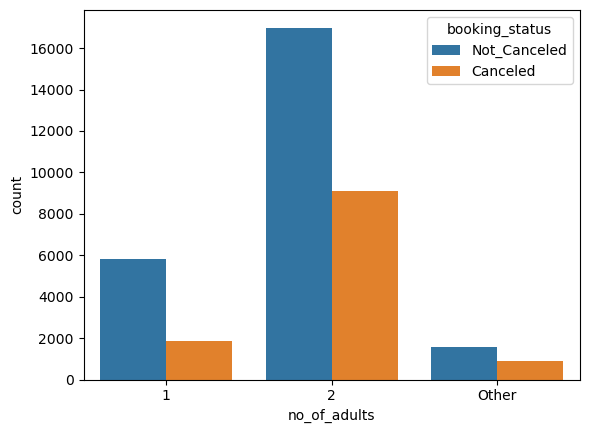

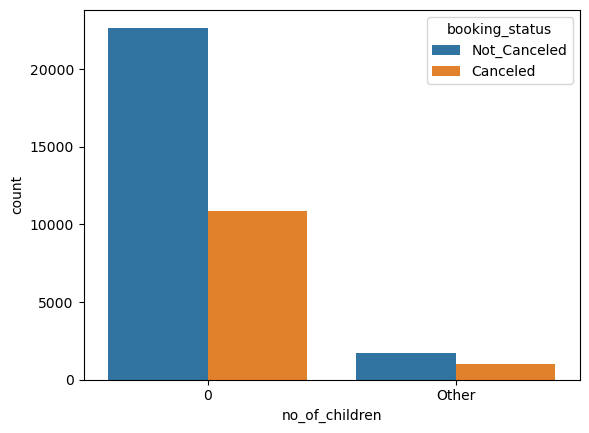

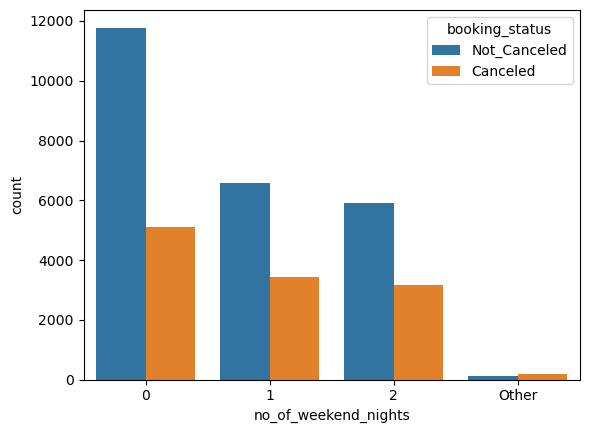

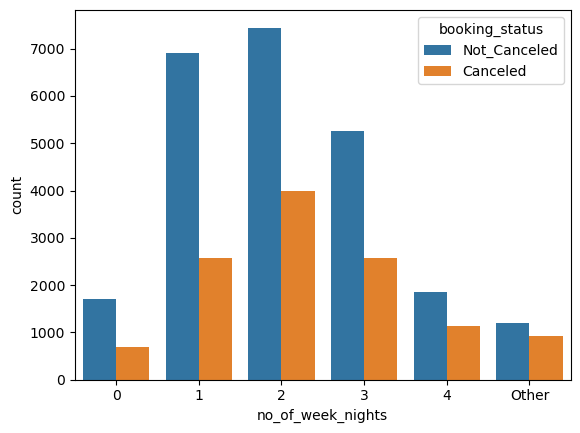

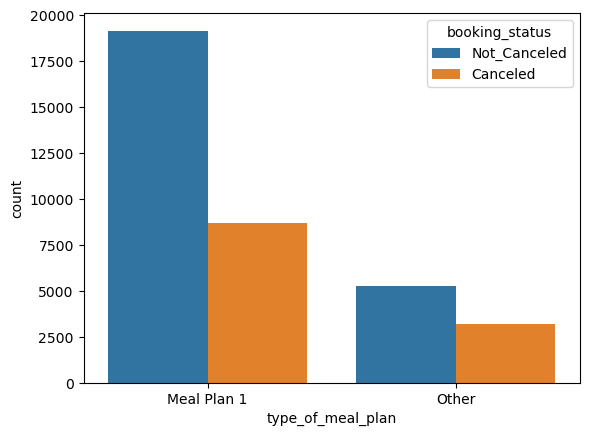

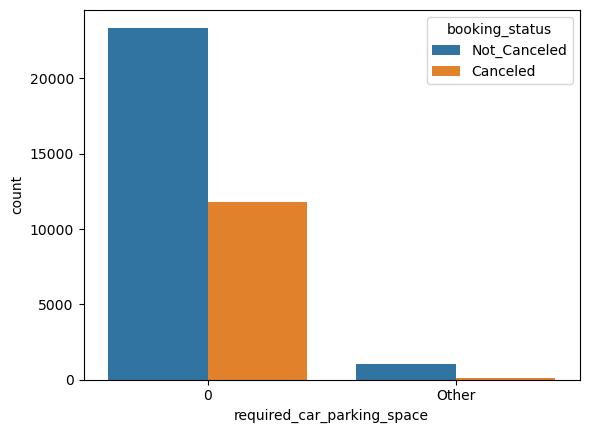

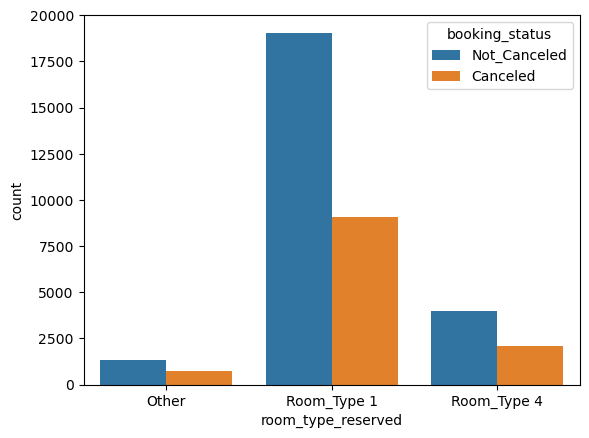

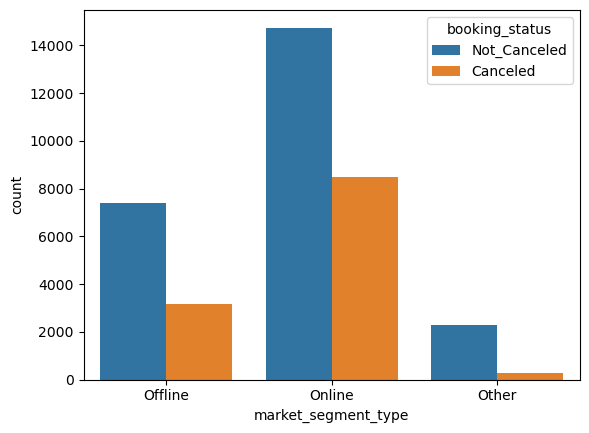

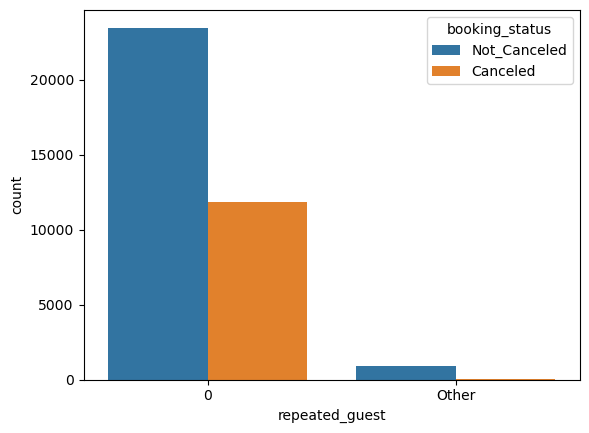

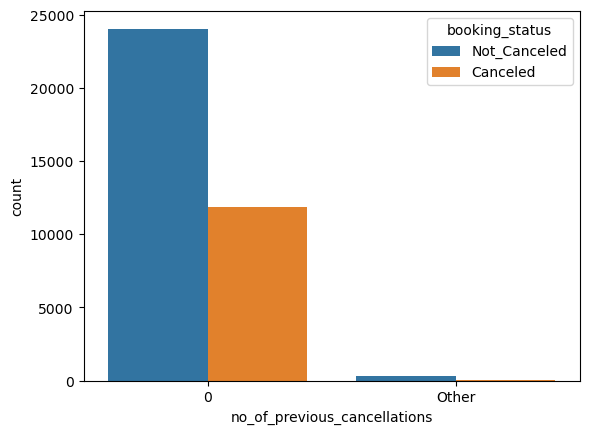

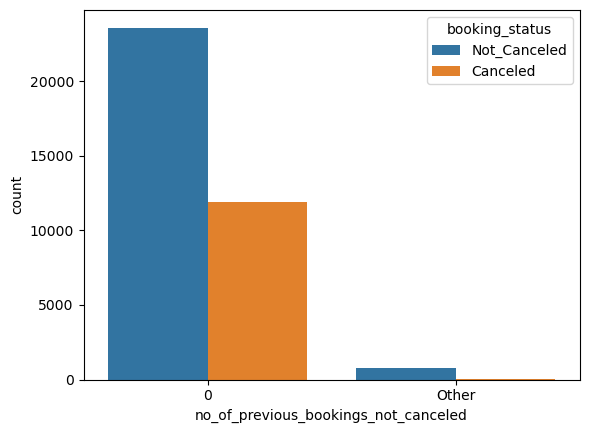

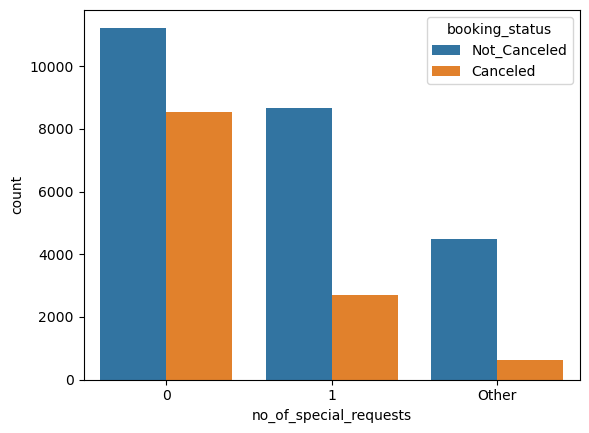

In [10]:
for col in df.columns:
    if col not in unselected_columns:
        to_binary_classes(df[col])

**Observations:**

- Bookings from a single adult is less likely to be cancelled.
- No strong indicator observed from number of children, but combination of number of adults and children can be considered since the unavailability of one person can lead to the higher possibility of cancellation (assumption 1).
- High number of weekend nights (greater than 2) is less likely to occur for booking, but high possibility of cancelation since number of booking days must be over 7 (a week) to have more than 2 weekend nights.
- Higher number of week nights also lead to the possibility of cancelation.
- Booking with no car parking is less likely to be canceled.
- Direct booking with the hotel (online, offline) is highly to be canceled.
- Number of previous booking is a great indicator of cancellation, where people that are newly booked come with higher risk (even a successful or a cancelled booking).
- A special request would reduce the probability of cancelation.

**Potential features:** `no_of_adults`, `no_of_booking_nights`(\*), `required_car_parking_space`, `market_segment_type`, `repeated_guest`, `has_special_request`(\*).

(\*) Will be extracted later

However, these individual indicators is not supposed to be potential. Combination of these factors could be. Decision tree could be a helpful method to identify this.

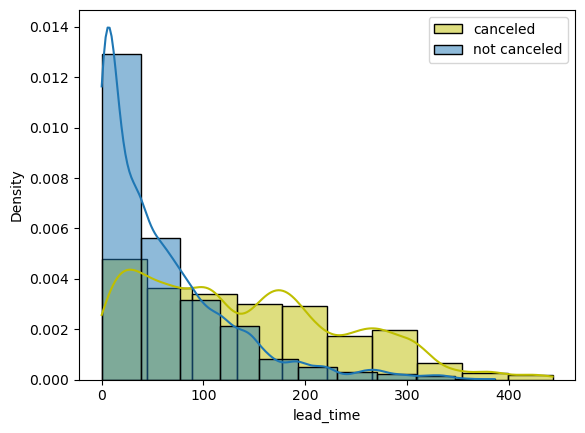

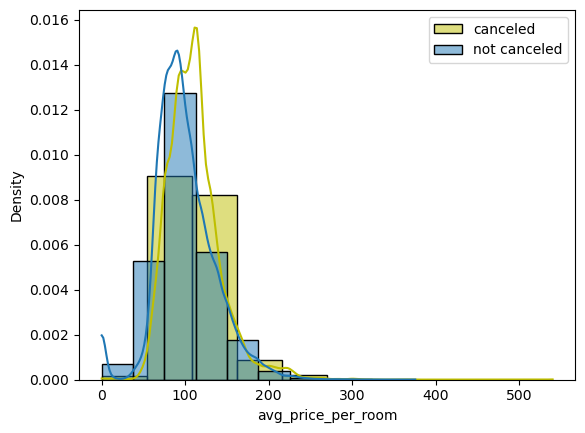

In [14]:
continuous_variables = ['lead_time', 'avg_price_per_room']
canceled_df = df[target_df == 'Canceled']
not_canceled_df = df[target_df == 'Not_Canceled']

for col in continuous_variables:
    plt.figure()
    sns.histplot(canceled_df[col], label='canceled', bins=10, kde=True, stat='density', color='y')
    sns.histplot(not_canceled_df[col], label='not canceled', bins=10, kde=True, stat='density')
    plt.legend()

`lead_time` can be a potential factor, since a small amount of lead time could indicate that there is a higher chance of non-cancelation from the bookings.

<AxesSubplot:xlabel='no_of_booking_nights', ylabel='count'>

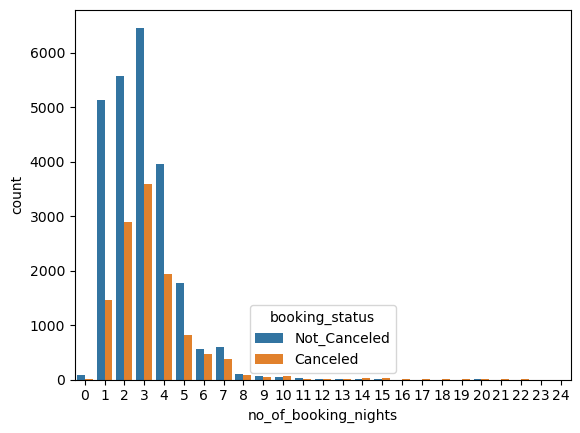

In [12]:
df['no_of_booking_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
sns.countplot(x=df['no_of_booking_nights'], hue=target_df)

<AxesSubplot:xlabel='no_of_booking_nights'>

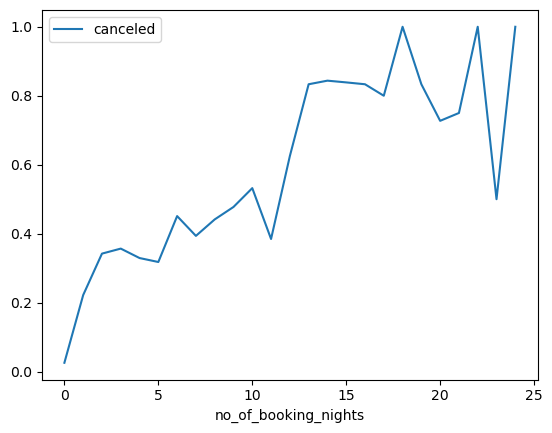

In [25]:
df_booking_nights_to_cancel = pd.DataFrame()
df_booking_nights_to_cancel['no_of_booking_nights'] = df['no_of_booking_nights']
df_booking_nights_to_cancel['canceled'] = target_df == 'Canceled'

df_booking_nights_to_cancel_grouped = df_booking_nights_to_cancel.groupby('no_of_booking_nights')
proportion_by_booking_nights = df_booking_nights_to_cancel_grouped.sum() / df_booking_nights_to_cancel_grouped.count()
proportion_by_booking_nights.plot()

<AxesSubplot:xlabel='no_of_people', ylabel='count'>

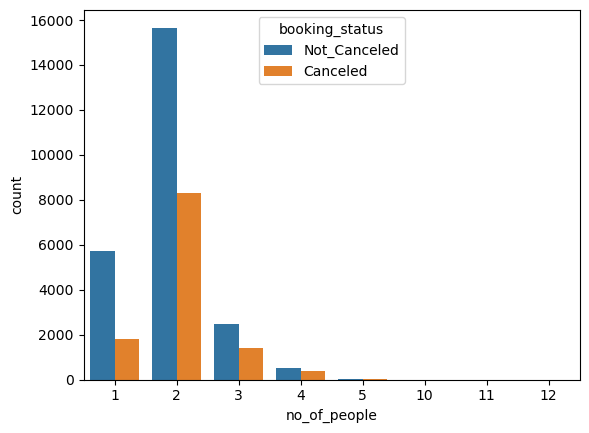

In [28]:
df['no_of_people'] = df['no_of_adults'] + df['no_of_children']
sns.countplot(x=df['no_of_people'], hue=target_df)

<AxesSubplot:xlabel='no_of_people'>

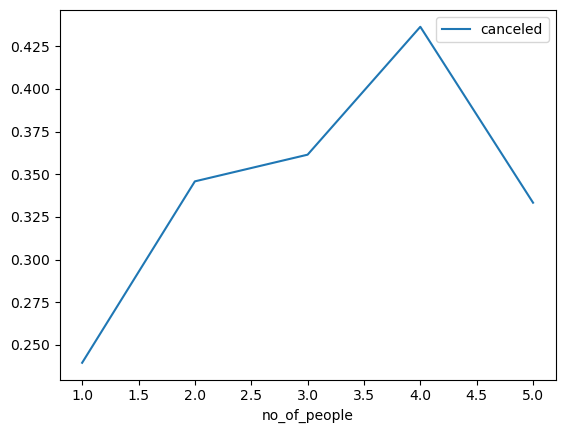

In [32]:
df_people_to_cancel = pd.DataFrame()
df_people_to_cancel['no_of_people'] = df['no_of_people']
df_people_to_cancel['canceled'] = target_df == 'Canceled'

df_people_to_cancel_grouped = df_people_to_cancel.groupby('no_of_people')
proportion_by_people = df_people_to_cancel_grouped.sum() / df_people_to_cancel_grouped.count()
proportion_by_people[proportion_by_people.index < 6].plot()

<AxesSubplot:xlabel='booking_status', ylabel='has_special_request'>

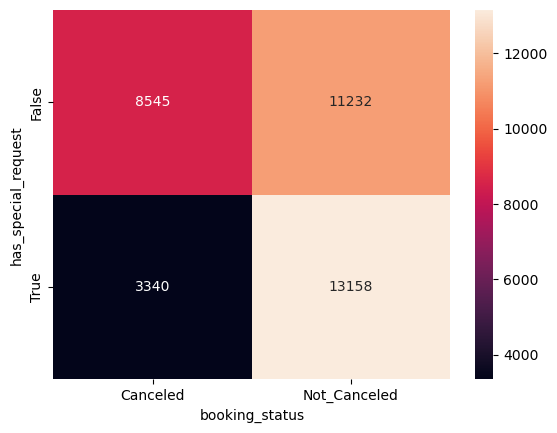

In [40]:
df['has_special_request'] = df['no_of_special_requests'] != 0
sns.heatmap(pd.crosstab(df['has_special_request'], target_df), annot=True, fmt='g')

## 2. Are cancellations more likely during weekends?

<AxesSubplot:xlabel='booking_status', ylabel='has_weekend'>

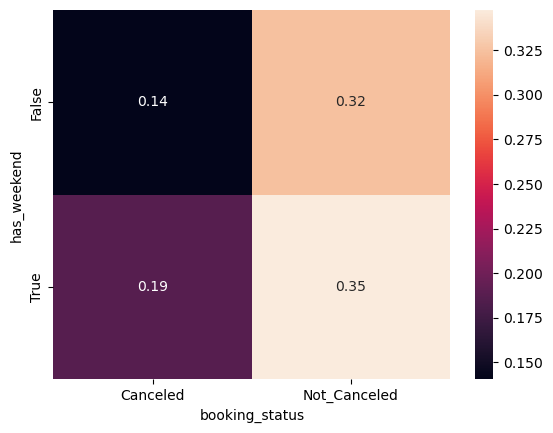

In [43]:
df['has_weekend'] = df['no_of_weekend_nights'] > 0
sns.heatmap(pd.crosstab(df['has_weekend'], target_df) / len(df), annot=True)

We do not have enough evidence to conclude this since the proportion of cancelation on booking with or without weekend nights are similar.

## 3. Which general recommendations for the hotel can we make?

We are thinking of limited the number of nights to be booked for the first booking, and add a previllege to have higher number of booking later. However, the assumption needs to be checked.

In [47]:
df_with_repeated_guest = df[df['repeated_guest'] == 1]
target_with_repeated_guest = target_df[df['repeated_guest'] == 1]

<AxesSubplot:xlabel='no_of_booking_nights'>

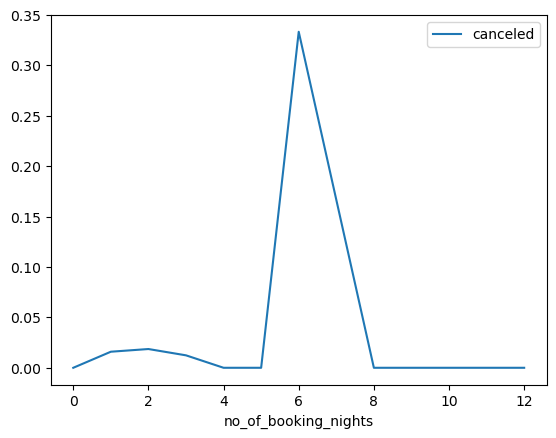

In [48]:
df_booking_nights_to_cancel['no_of_booking_nights'] = df_with_repeated_guest['no_of_booking_nights']
df_booking_nights_to_cancel['canceled'] = target_with_repeated_guest == 'Canceled'

df_booking_nights_to_cancel_grouped = df_booking_nights_to_cancel.groupby('no_of_booking_nights')
proportion_by_booking_nights = df_booking_nights_to_cancel_grouped.sum() / df_booking_nights_to_cancel_grouped.count()
proportion_by_booking_nights.plot()

<AxesSubplot:xlabel='no_of_booking_nights', ylabel='count'>

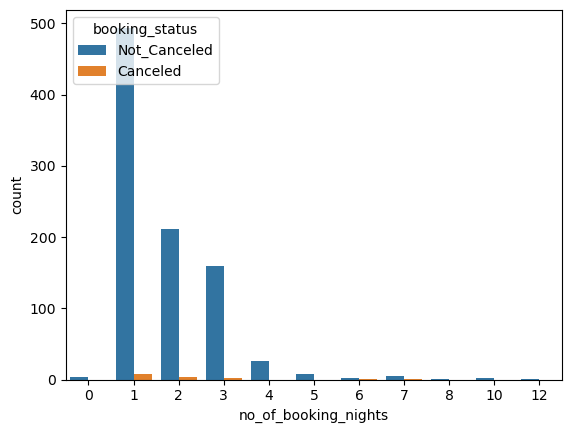

In [49]:
sns.countplot(x=df_with_repeated_guest['no_of_booking_nights'], hue=target_with_repeated_guest)

It is confident to provide more days of booking for repeated guest since the number of cancellation is relatively low.

In [50]:
df_without_repeated_guest = df[df['repeated_guest'] == 0]
target_without_repeated_guest = target_df[df['repeated_guest'] == 0]

<AxesSubplot:xlabel='no_of_booking_nights', ylabel='count'>

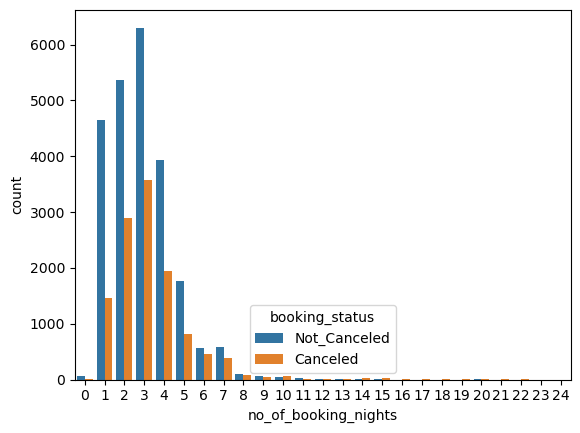

In [51]:
sns.countplot(x=df_without_repeated_guest['no_of_booking_nights'], hue=target_without_repeated_guest)

<AxesSubplot:xlabel='no_of_booking_nights'>

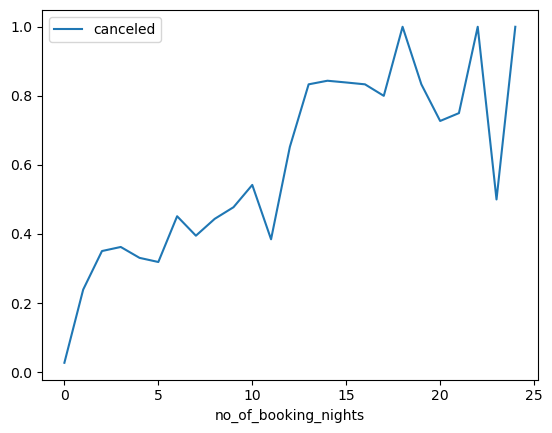

In [52]:
df_booking_nights_to_cancel['no_of_booking_nights'] = df_without_repeated_guest['no_of_booking_nights']
df_booking_nights_to_cancel['canceled'] = target_without_repeated_guest == 'Canceled'

df_booking_nights_to_cancel_grouped = df_booking_nights_to_cancel.groupby('no_of_booking_nights')
proportion_by_booking_nights = df_booking_nights_to_cancel_grouped.sum() / df_booking_nights_to_cancel_grouped.count()
proportion_by_booking_nights.plot()

Depends on the benefit, one can set the limit of booking nights for first-time customer to 7, which has the probability of cancelation over 50%. Less can be favorable but provide unsatisfying customer experience and may reduce return rate.

## 4. Can we create a prediction model to know whether the reservation is likely to be cancelled or not?

We will use Decision Tree to identify more insights at first, then comes to Random Forest which is an ultimate binary classifier later.

In [121]:
selected_boolean_or_int_features = ['no_of_adults', 'no_of_booking_nights', 'required_car_parking_space', 'repeated_guest', 'has_special_request', 'lead_time']
selected_categorical_features = ['market_segment_type']

In [149]:
selected_df = df[selected_boolean_or_int_features]
selected_df_combined = pd.concat([selected_df] + [pd.get_dummies(df[col]) for col in selected_categorical_features], axis=1).astype('int')
selected_df_combined

,no_of_adults,no_of_booking_nights,required_car_parking_space,repeated_guest,has_special_request,lead_time,Aviation,Complementary,Corporate,Offline,Online
Booking_ID,,,,,,,,,,,
INN00001,2,3,0,0,0,224,0,0,0,1,0
INN00002,2,5,0,0,1,5,0,0,0,0,1
INN00003,1,3,0,0,0,1,0,0,0,0,1
INN00004,2,2,0,0,0,211,0,0,0,0,1
INN00005,2,2,0,0,0,48,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,8,0,0,1,85,0,0,0,0,1
INN36272,2,4,0,0,1,228,0,0,0,0,1
INN36273,2,8,0,0,1,148,0,0,0,0,1


In [150]:
X = selected_df_combined
y = target_df
X.shape, y.shape

((36275, 11), (36275,))

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25392, 11), (25392,), (10883, 11), (10883,))

In [152]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (25392, 11)
Shape of the test set:  (10883, 11)
Percentage of classes in the training set:
Not_Canceled    0.673992
Canceled        0.326008
Name: booking_status, dtype: float64
Percentage of classes in the test set:
Not_Canceled    0.668566
Canceled        0.331434
Name: booking_status, dtype: float64


In [153]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [154]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = 'g', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

    Canceled       0.74      0.72      0.73      3607
Not_Canceled       0.86      0.87      0.87      7276

    accuracy                           0.82     10883
   macro avg       0.80      0.80      0.80     10883
weighted avg       0.82      0.82      0.82     10883



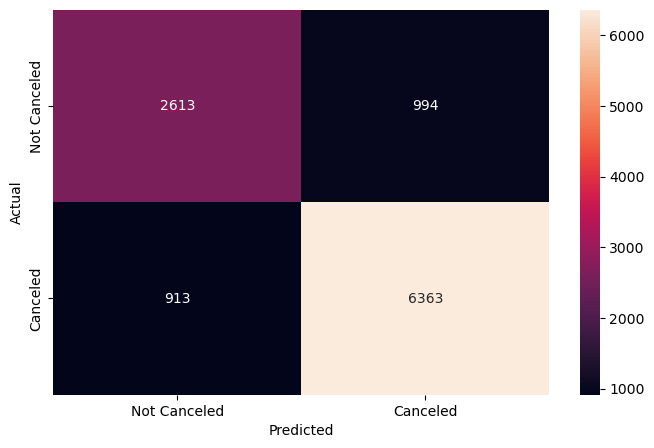

In [155]:
# Checking performance on the training data
y_pred = d_tree.predict(X_test)
metrics_score(y_test, y_pred)

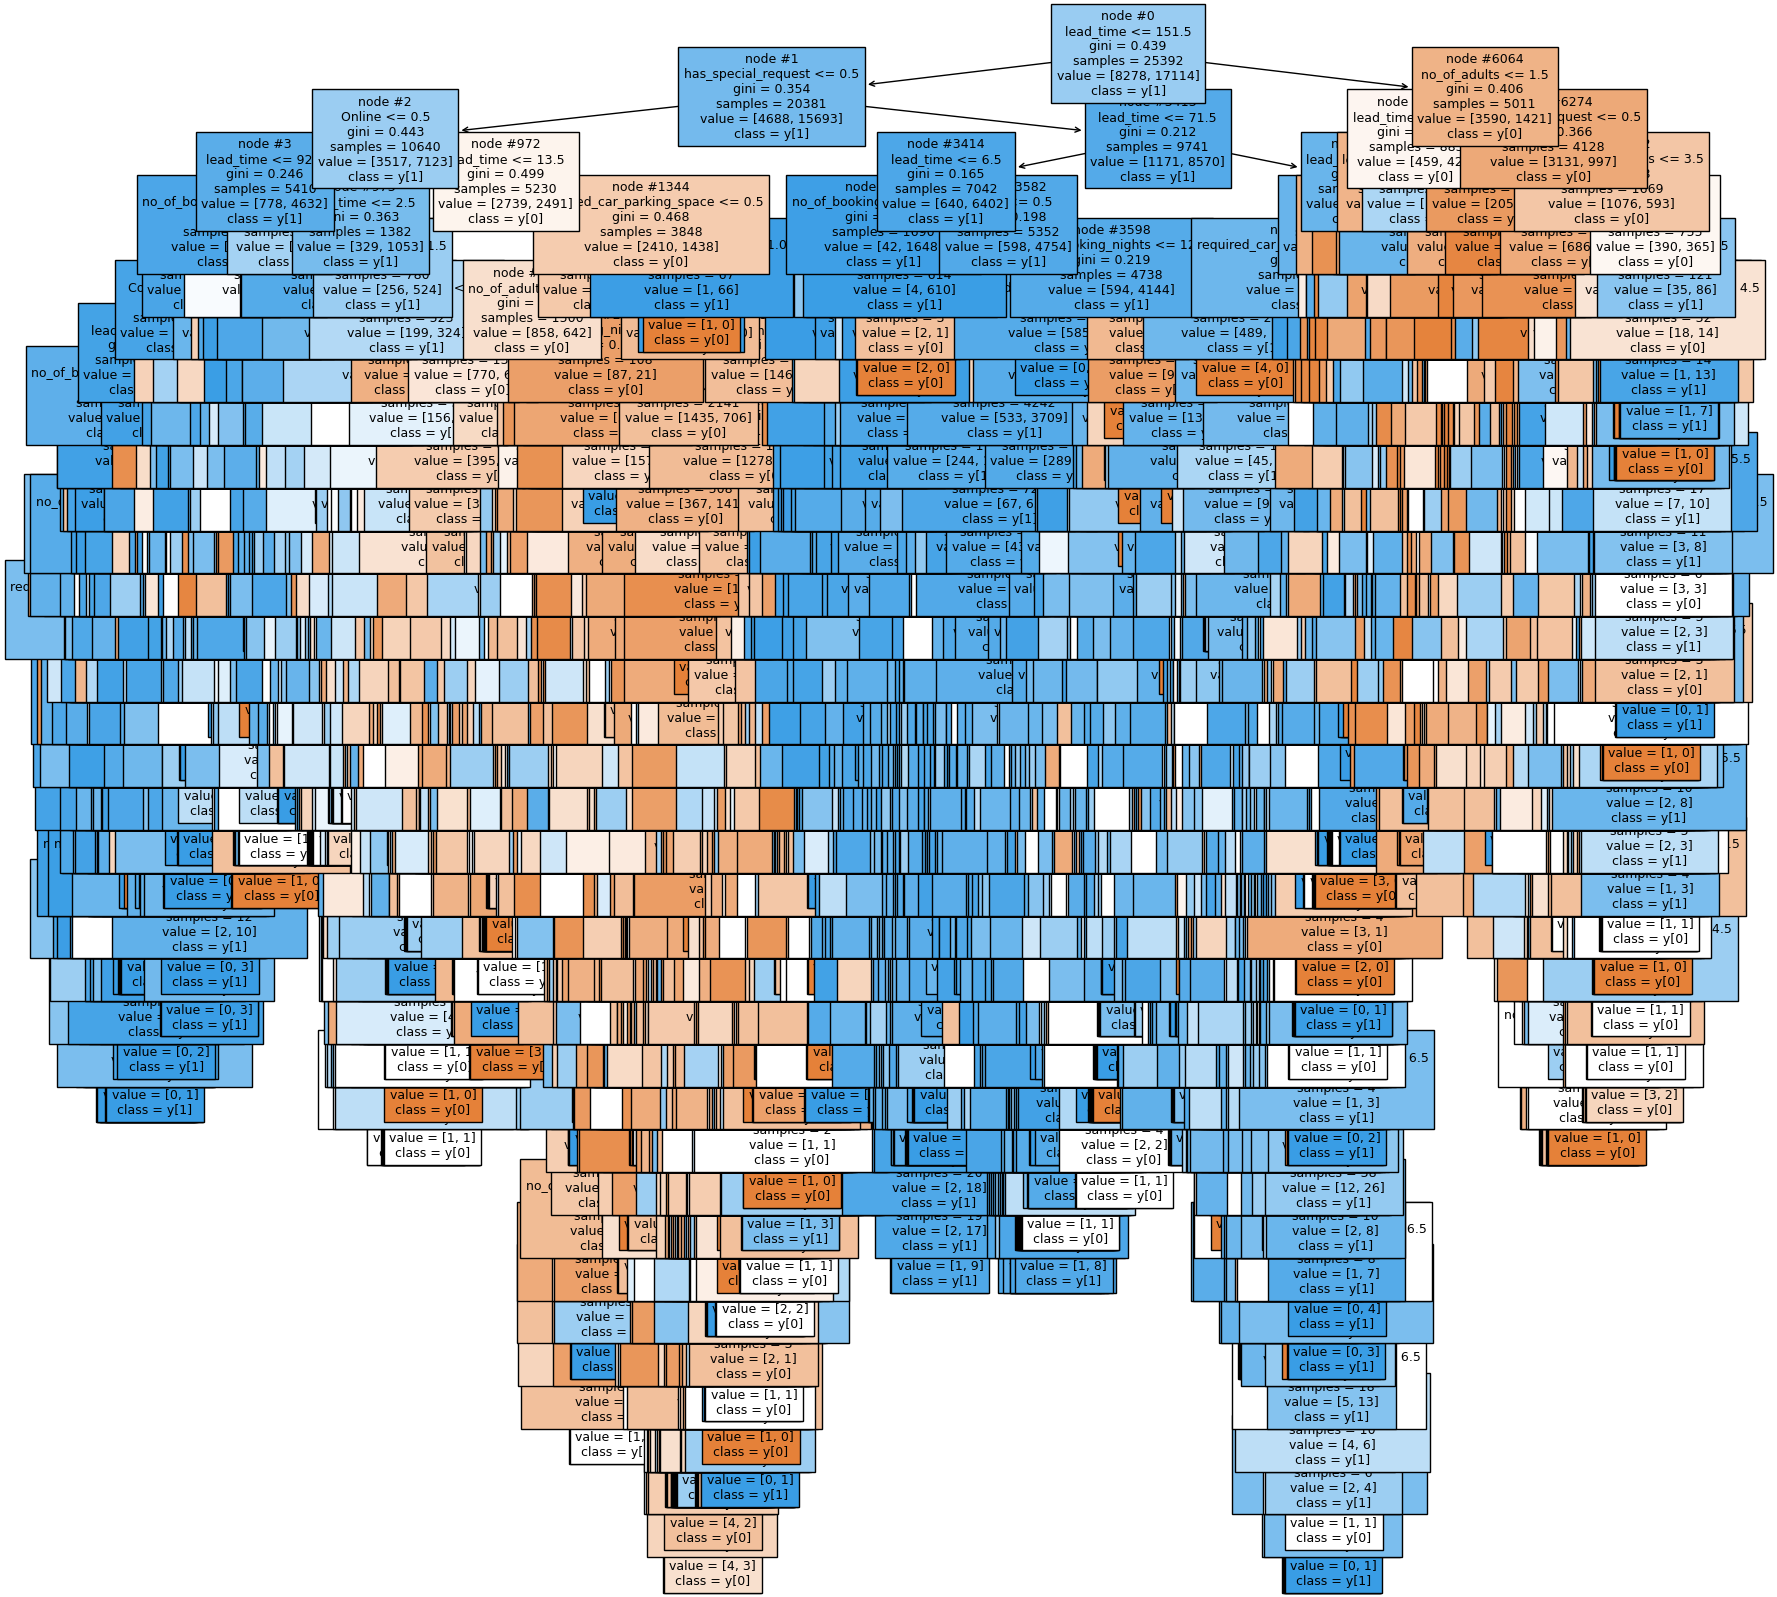

In [156]:
features = list(X.columns)
plt.figure(figsize = (20, 20))
plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [135]:
pd.DataFrame(d_tree.feature_importances_, columns=['Importance'], index=X_train.columns).sort_values('Importance')

,Importance
Aviation,0.000326
Complementary,0.000604
repeated_guest,0.001769
Corporate,0.003072
required_car_parking_space,0.011052
Offline,0.018622
no_of_adults,0.051147
has_special_request,0.068474
Online,0.108669
no_of_booking_nights,0.131818


In [132]:
X.columns

Index(['no_of_adults', 'no_of_booking_nights', 'required_car_parking_space',
       'repeated_guest', 'has_special_request', 'lead_time', 'Aviation',
       'Complementary', 'Corporate', 'Offline', 'Online'],
      dtype='object')